In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [4]:
cd= pd.read_csv("D://assignments//Assignment 15//Fraud_check.csv")
cd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df2 = cd.rename(columns = {'Taxable.Income': 'income'}, inplace = False)

(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <BarContainer object of 10 artists>)

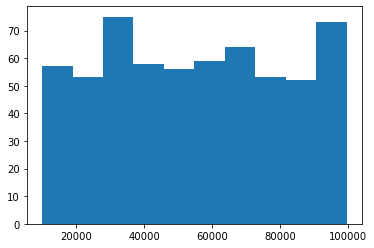

In [10]:
plt.hist(df2['income']) 

In [12]:
label_encoder = preprocessing.LabelEncoder()
cd['Undergrad']= label_encoder.fit_transform(cd['Undergrad']) 
cd['Urban']= label_encoder.fit_transform(cd['Urban'])
cd['Marital.Status']= label_encoder.fit_transform(cd['Marital.Status'])

In [13]:
cd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [14]:
df=cd

In [15]:
def func(x):
    if  x <= 30000:
        return 'Risky'
    else :
        return 'Good'

In [16]:
df['Taxable_income'] = df['Taxable.Income'].apply(func)


In [17]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [18]:
df['Taxable_income']= label_encoder.fit_transform(df['Taxable_income'])

In [19]:
df = df.drop('Taxable.Income', 1)


In [20]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [21]:
x=df.iloc[:,:5]
y=df['Taxable_income']

In [22]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_income, Length: 600, dtype: int32

In [24]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [26]:
X_train

array([[ 0.98113038,  1.14802316,  1.7143464 , -0.06043462,  1.        ],
       [-1.01923253,  1.14802316, -1.21953377,  1.05283463, -1.        ],
       [ 0.98113038, -1.26282547,  0.06933349, -0.17176154, -1.        ],
       ...,
       [ 0.98113038,  1.14802316,  0.44880586, -1.39635771,  1.        ],
       [ 0.98113038, -1.26282547, -1.68261904, -0.72839616, -1.        ],
       [ 0.98113038, -1.26282547,  1.13754596,  0.38487308,  1.        ]])

In [27]:
X_test

array([[ 9.81130380e-01,  1.14802316e+00, -1.64812897e+00,
        -1.61901156e+00, -1.00000000e+00],
       [-1.01923253e+00, -1.26282547e+00, -1.58047538e+00,
         1.05283463e+00, -1.00000000e+00],
       [ 9.81130380e-01,  1.14802316e+00, -6.53182387e-01,
         1.49814233e+00, -1.00000000e+00],
       [-1.01923253e+00, -5.74011578e-02,  1.29287371e+00,
        -6.17069238e-01, -1.00000000e+00],
       [ 9.81130380e-01,  1.14802316e+00,  1.35150332e-01,
        -1.06237694e+00, -1.00000000e+00],
       [ 9.81130380e-01, -1.26282547e+00, -1.52471984e+00,
         1.49814233e+00, -1.00000000e+00],
       [-1.01923253e+00, -5.74011578e-02, -1.34869805e+00,
         1.49814233e+00, -1.00000000e+00],
       [-1.01923253e+00, -5.74011578e-02,  4.08234109e-01,
        -1.71761541e-01,  1.00000000e+00],
       [ 9.81130380e-01,  1.14802316e+00, -1.31606514e+00,
        -2.83088465e-01,  1.00000000e+00],
       [ 9.81130380e-01, -1.26282547e+00, -1.20902349e+00,
        -6.17069238e-01

In [28]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[131   9]
 [ 39   1]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       140
           1       0.10      0.03      0.04        40

    accuracy                           0.73       180
   macro avg       0.44      0.48      0.44       180
weighted avg       0.62      0.73      0.67       180

0.7333333333333333


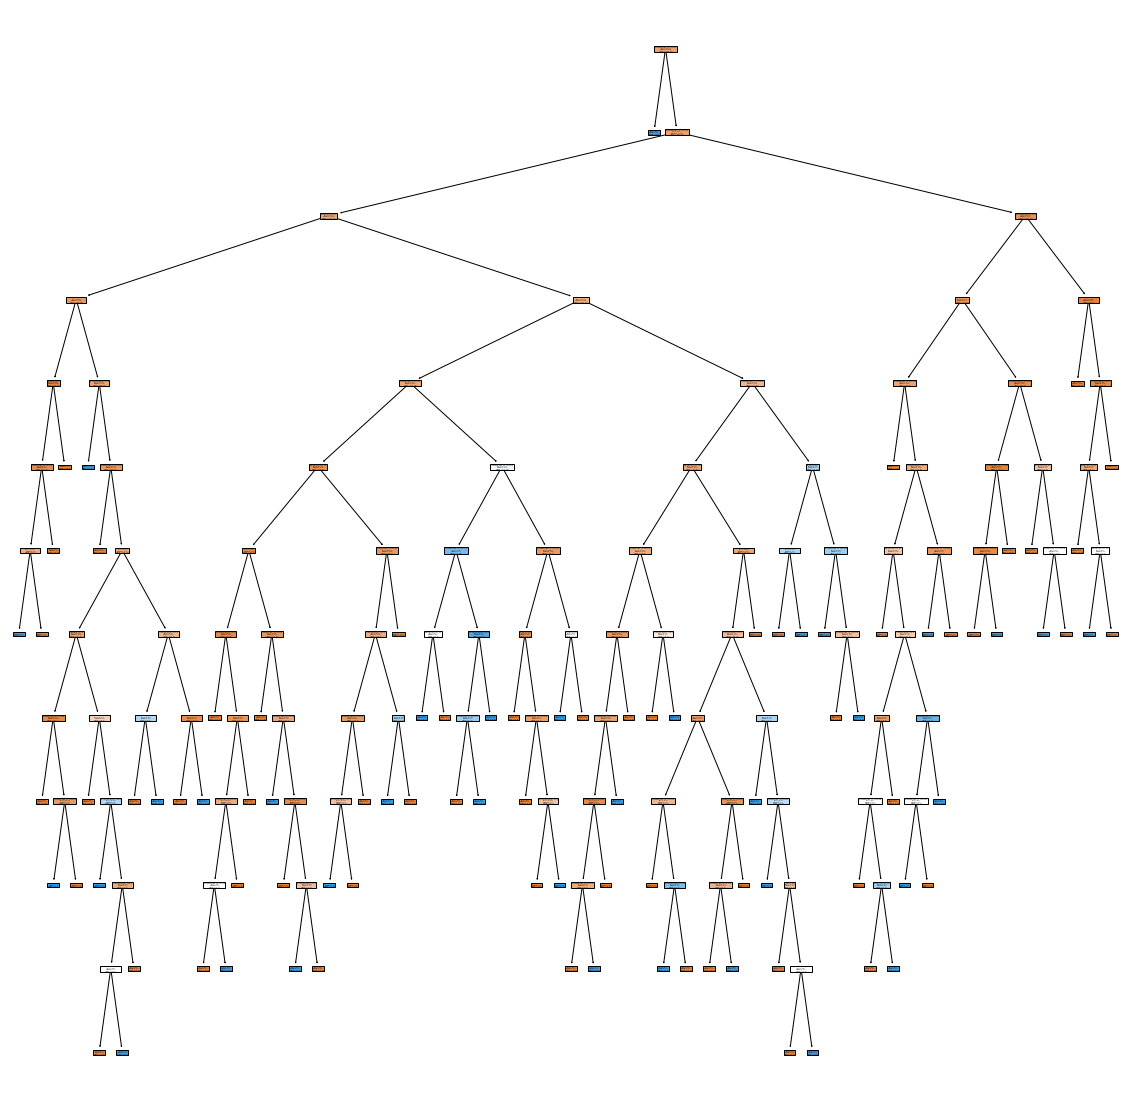

In [31]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(classifier.estimators_[0], feature_names=x.columns, filled=True)